# Notas

## Step 1 - Data manipulation and visualization

## Ler os Dados

In [140]:
# Defining Global Variables
DATA_FOLDER = 'data'
WORLD_DATA_FILE = 'world-data.csv'

# import the necessary dependencies
import pandas as pd

# creating custom date parser (mm/dd/yy)
from datetime import datetime
custom_date_parser = lambda x: datetime.strptime(x, '%m/%d/%y')

# re-read csv
covid_world_dataframe = pd.read_csv(f'{DATA_FOLDER}/{WORLD_DATA_FILE}', parse_dates=['Date'], date_parser=custom_date_parser)
covid_world_dataframe.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0
1,NaN,Albania,41.1533,20.1683,2020-01-22,0,0,0
2,NaN,Algeria,28.0339,1.6596,2020-01-22,0,0,0
3,NaN,Andorra,42.5063,1.5218,2020-01-22,0,0,0
4,NaN,Angola,-11.2027,17.8739,2020-01-22,0,0,0


## Tratamento dos Dados

### Correção de Problemas

### Problemas
 1. Alguns Paises não tem `Province/State`
 2. Os que têm `Province/State` também têm `Lat` e `Long` diferentes
 3. Os que têm `Province/State` também têm `Confirmed`, `Deaths` e `Recovered` para esse `Province/State`
 
### Solução
 1. Agrupar os dados por `Country/Region` e `Date`
 2. Fazer a média dentro do mesmo país
 3. Somar todos os casos das `Province/State` e colocar esse valor no país

In [76]:
# remover coluna 'Province/State'
covid_world_dataframe = covid_world_dataframe.drop(labels=['Province/State'], axis=1)
covid_world_dataframe.head()

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0
1,Albania,41.1533,20.1683,2020-01-22,0,0,0
2,Algeria,28.0339,1.6596,2020-01-22,0,0,0
3,Andorra,42.5063,1.5218,2020-01-22,0,0,0
4,Angola,-11.2027,17.8739,2020-01-22,0,0,0


In [77]:
# Calcular novas 'Lat', 'Long', 'Confirmed', 'Deaths', 'Recovered'
aggregation_functions = {
    # Calculate the average latitude and longitude
    'Lat': 'mean',
    'Long': 'mean',
    # Calculate the sum of confirmed cases, deaths and recovered of the day
    'Confirmed': 'sum',
    'Deaths': 'sum',
    'Recovered': 'sum'
}
# group by country and date
covid_world_dataframe = covid_world_dataframe.groupby(['Date', 'Country/Region']).aggregate(aggregation_functions)
covid_world_dataframe.head()

Lat     Long  Confirmed  Deaths  Recovered
Date       Country/Region                                                
2020-01-22 Afghanistan     33.0000  65.0000          0       0          0
           Albania         41.1533  20.1683          0       0          0
           Algeria         28.0339   1.6596          0       0          0
           Andorra         42.5063   1.5218          0       0          0
           Angola         -11.2027  17.8739          0       0          0

Graças ao `groupby(['Date', 'Country/Region']` o indice das tabelas é o multi indice `[Date, Country/Region]`. Vamos voltar ao estado inicial:

```python
# Remover um indice específico, neste caso Country/Region
covid_world_dataframe = covid_world_dataframe.reset_index(level=['Country/Region'])
# Remover todos os indices
covid_world_dataframe = covid_world_dataframe.reset_index()
# ou
covid_world_dataframe.reset_index(inplace=True)
```

In [78]:
covid_world_dataframe = covid_world_dataframe.reset_index()
covid_world_dataframe.head()

,Date,Country/Region,Lat,Long,Confirmed,Deaths,Recovered
0,2020-01-22,Afghanistan,33.0000,65.0000,0,0,0
1,2020-01-22,Albania,41.1533,20.1683,0,0,0
2,2020-01-22,Algeria,28.0339,1.6596,0,0,0
3,2020-01-22,Andorra,42.5063,1.5218,0,0,0
4,2020-01-22,Angola,-11.2027,17.8739,0,0,0


### Filtragem de Dados

Vamos filtrar apenas os Estados Unidos *(US)*, Reino Unido *(United Kingdom)*, China *(China)* e Portugal *(Portugal)*

In [79]:
# filter
countries = ['US', 'United Kingdom', 'China', 'Portugal']
covid_filtered_dataframe = covid_world_dataframe.loc[covid_world_dataframe['Country/Region'].isin(countries)]
covid_filtered_dataframe.head(8)

,Date,Country/Region,Lat,Long,Confirmed,Deaths,Recovered
36,2020-01-22,China,32.828385,111.649082,548,17,28
136,2020-01-22,Portugal,39.399900,-8.224500,0,0,0
174,2020-01-22,US,37.090200,-95.712900,1,0,0
178,2020-01-22,United Kingdom,24.548173,-43.902245,0,0,0
224,2020-01-23,China,32.828385,111.649082,643,18,30
324,2020-01-23,Portugal,39.399900,-8.224500,0,0,0
362,2020-01-23,US,37.090200,-95.712900,1,0,0
366,2020-01-23,United Kingdom,24.548173,-43.902245,0,0,0


### Plotting

Com os novos dados filtrados, vamos fazer um [pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html), para conseguirmos comparar os casos confirmados, mortos e recuperados.

''

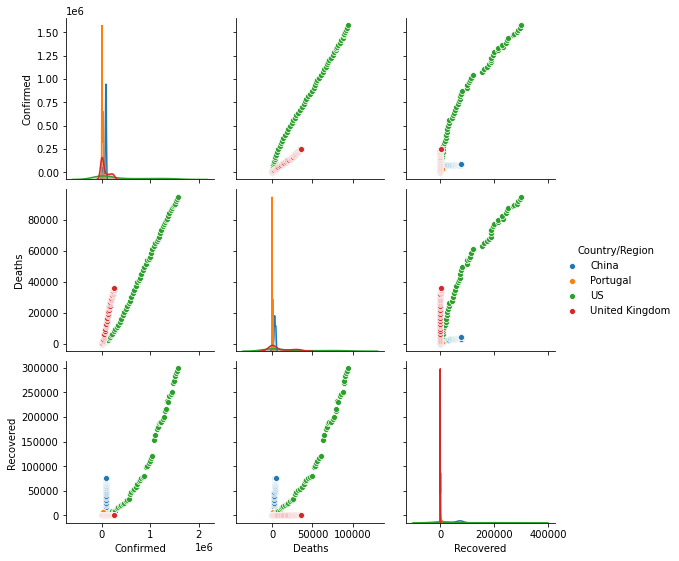

In [80]:
# plot
# This line tells the notebook to show plots inside of the notebook
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sb
sb.pairplot(covid_filtered_dataframe, hue='Country/Region', vars=['Confirmed', 'Deaths', 'Recovered'])
;

Vamos comparar os casos em Portugal ao longo do tempo

In [81]:
# create portgual dataframe
covid_portugal_dataframe = covid_world_dataframe.loc[covid_world_dataframe['Country/Region'] == 'Portugal']
covid_portugal_dataframe.head()

,Date,Country/Region,Lat,Long,Confirmed,Deaths,Recovered
136,2020-01-22,Portugal,39.3999,-8.2245,0,0,0
324,2020-01-23,Portugal,39.3999,-8.2245,0,0,0
512,2020-01-24,Portugal,39.3999,-8.2245,0,0,0
700,2020-01-25,Portugal,39.3999,-8.2245,0,0,0
888,2020-01-26,Portugal,39.3999,-8.2245,0,0,0


A forma mais facil de usar as datas como eixo horizontal é simplesmente torná-las como índice. O que até faz sentido uma vez que são unicas para cada país.

In [82]:
# set date as index and drop column
covid_portugal_dataframe.set_index('Date', inplace=True, drop=True)
covid_portugal_dataframe.head()

,Country/Region,Lat,Long,Confirmed,Deaths,Recovered
Date,,,,,,
2020-01-22,Portugal,39.3999,-8.2245,0,0,0
2020-01-23,Portugal,39.3999,-8.2245,0,0,0
2020-01-24,Portugal,39.3999,-8.2245,0,0,0
2020-01-25,Portugal,39.3999,-8.2245,0,0,0
2020-01-26,Portugal,39.3999,-8.2245,0,0,0


''

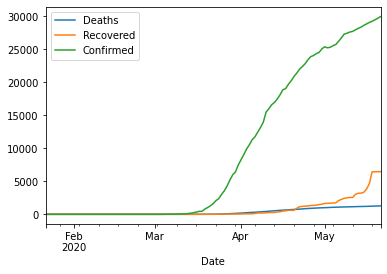

In [83]:
covid_portugal_dataframe[['Deaths', 'Recovered', 'Confirmed']].plot()
;

No entanto se quisermos usar explicitamente o **seaborn** (o que é obvio que queremos). Devemos usar o método `melt` e fazer reset ao indice.

In [84]:
covid_portugal_dataframe = covid_portugal_dataframe.reset_index()
covid_portugal_dataframe.head()

,Date,Country/Region,Lat,Long,Confirmed,Deaths,Recovered
0,2020-01-22,Portugal,39.3999,-8.2245,0,0,0
1,2020-01-23,Portugal,39.3999,-8.2245,0,0,0
2,2020-01-24,Portugal,39.3999,-8.2245,0,0,0
3,2020-01-25,Portugal,39.3999,-8.2245,0,0,0
4,2020-01-26,Portugal,39.3999,-8.2245,0,0,0


In [85]:
covid_portugal_dataframe_melt = pd.melt(covid_portugal_dataframe, ['Date', 'Country/Region', 'Lat', 'Long'], value_name='Count')
covid_portugal_dataframe_melt

,Date,Country/Region,Lat,Long,variable,Count
0,2020-01-22,Portugal,39.3999,-8.2245,Confirmed,0
1,2020-01-23,Portugal,39.3999,-8.2245,Confirmed,0
2,2020-01-24,Portugal,39.3999,-8.2245,Confirmed,0
3,2020-01-25,Portugal,39.3999,-8.2245,Confirmed,0
4,2020-01-26,Portugal,39.3999,-8.2245,Confirmed,0
...,...,...,...,...,...,...
358,2020-05-17,Portugal,39.3999,-8.2245,Recovered,4636
359,2020-05-18,Portugal,39.3999,-8.2245,Recovered,6430
360,2020-05-19,Portugal,39.3999,-8.2245,Recovered,6431
361,2020-05-20,Portugal,39.3999,-8.2245,Recovered,6452


''

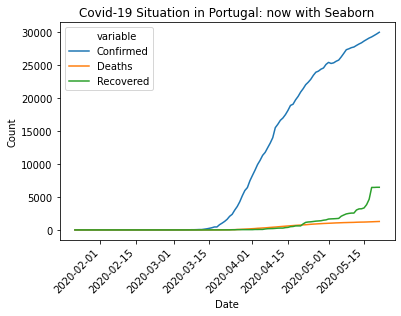

In [86]:
ax = sb.lineplot(x='Date', y='Count', hue='variable', data=covid_portugal_dataframe_melt)
ax.set_title('Covid-19 Situation in Portugal: now with Seaborn')
plt.draw()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
;

Caso queiremos ver os gráficos separamente (usando **seaborn**)::

''

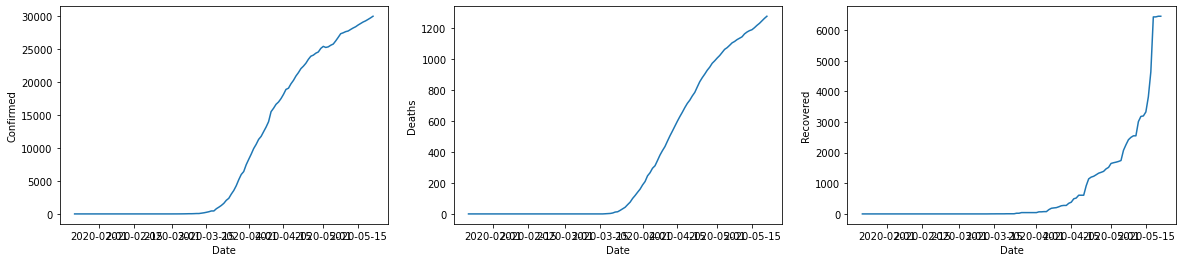

In [87]:
# criar area de plot
plt.figure(figsize=(20, 4))
# subplot de confirmed
plt.subplot(1, 3, 1)
sb.lineplot(x='Date', y='Confirmed', data=covid_portugal_dataframe)
# subplot de deaths
plt.subplot(1, 3, 2)
sb.lineplot(x='Date', y='Deaths', data=covid_portugal_dataframe)
# subplot de recovered
plt.subplot(1, 3, 3)
sb.lineplot(x='Date', y='Recovered', data=covid_portugal_dataframe)
# mostrar plot (nao necessario)
plt.draw()
;

Vamos comparar os 4 paises incialmente filtrados

Comparando casos confirmados entre os 4 paises

In [88]:
# create new dataset for chosen countries
confirmed_dataframe = covid_filtered_dataframe[['Date']].copy()
confirmed_dataframe.drop_duplicates(inplace=True)

def get_country_victims(country: str, victims: str):
    return covid_filtered_dataframe.loc[covid_filtered_dataframe['Country/Region'] == country , victims].tolist()

confirmed_dataframe['Portugal'] = get_country_victims('Portugal', 'Confirmed')
confirmed_dataframe['US'] = get_country_victims('US', 'Confirmed')
confirmed_dataframe['United Kingdom'] = get_country_victims('United Kingdom', 'Confirmed')
confirmed_dataframe['China'] = get_country_victims('China', 'Confirmed')
confirmed_dataframe

,Date,Portugal,US,United Kingdom,China
36,2020-01-22,0,1,0,548
224,2020-01-23,0,1,0,643
412,2020-01-24,0,2,0,920
600,2020-01-25,0,2,0,1406
788,2020-01-26,0,5,0,2075
...,...,...,...,...,...
21844,2020-05-17,29036,1486757,244995,84054
22032,2020-05-18,29209,1508308,247709,84063
22220,2020-05-19,29432,1528568,250138,84063
22408,2020-05-20,29660,1551853,249619,84063


''

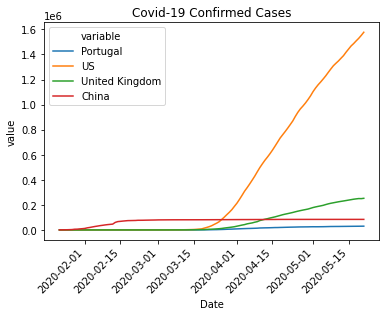

In [89]:
confirmed_dataframe_melt = pd.melt(confirmed_dataframe, ['Date'])
ax = sb.lineplot(x='Date', y='value', hue='variable', data=confirmed_dataframe_melt)
ax.set_title('Covid-19 Confirmed Cases')
plt.draw()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
;

Agora vamos ver a curva de casos confirmados destes 4 paises

In [90]:
# create portugal dataframe
# already done
# create US dataframe
covid_us_dataframe = covid_world_dataframe.loc[covid_world_dataframe['Country/Region'] == 'US']
# create UK dataframe
covid_uk_dataframe = covid_world_dataframe.loc[covid_world_dataframe['Country/Region'] == 'United Kingdom']
# create China dataframe
covid_china_dataframe = covid_world_dataframe.loc[covid_world_dataframe['Country/Region'] == 'China']

''

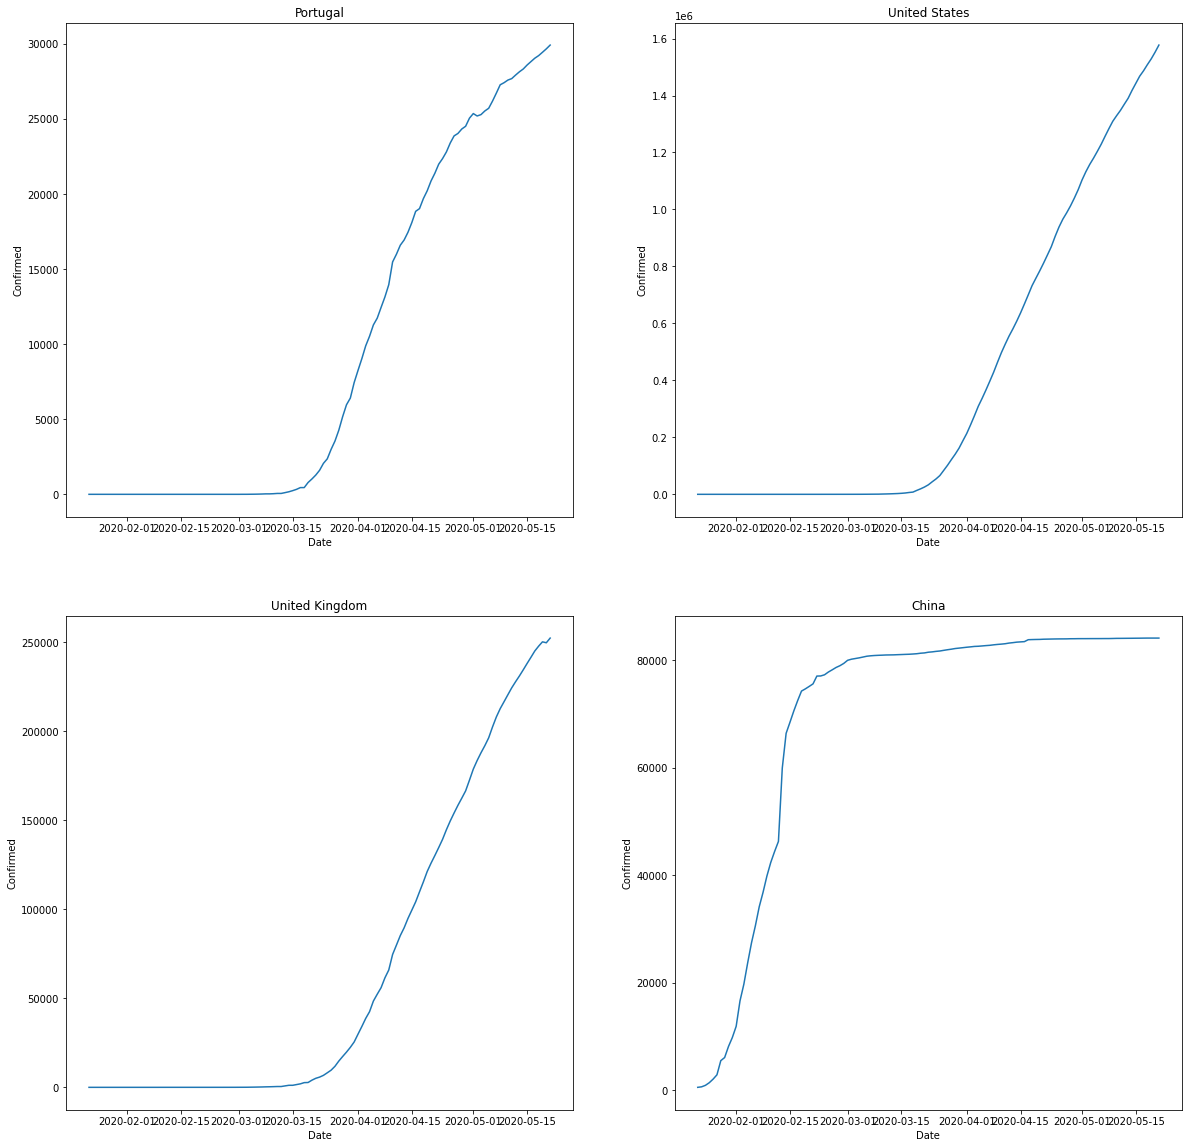

In [91]:
plt.figure(figsize=(20, 20))

plt.subplot(2, 2, 1)
sb.lineplot(x='Date', y='Confirmed', data=covid_portugal_dataframe).set_title('Portugal')
plt.subplot(2, 2, 2)
sb.lineplot(x='Date', y='Confirmed', data=covid_us_dataframe).set_title('United States')
plt.subplot(2, 2, 3)
sb.lineplot(x='Date', y='Confirmed', data=covid_uk_dataframe).set_title('United Kingdom')
plt.subplot(2, 2, 4)
sb.lineplot(x='Date', y='Confirmed', data=covid_china_dataframe).set_title('China')
;

## Part 2 - Clustering

**SOURCE:** https://towardsdatascience.com/classify-growth-patterns-for-covid-19-data-41af4c7adc55

**GITHUB:** https://github.com/Perishleaf/data-visualisation-scripts/blob/master/coronavirus_country_PCoA/COVID-19_analysis.ipynb

Nevertheless, visual differentiation of these many curves is rather difficult. It is better to classify these curves into clusters, in which similar curves are classified as the same group. Here, I combined Principle Co-ordinates Analysis (PCoA) with k-mean clustering to plot similarities of countries/regions incremental patterns on a 2-D dimension and classify them into groups. In a nutshell, nearby circles (i.e countries/regions) in 2-D ordination should have similar growth patterns, circles which are far apart from each other have few patterns in common.

Let's make contry rows into columns: https://stackoverflow.com/questions/17298313/python-pandas-convert-rows-as-column-headers

In [92]:
# we dont need to remove unused columns, pivo_table already does that
'''
# remove lat, long, deaths and recovered
new_dataframe = covid_world_dataframe.drop(labels=['Lat', 'Long', 'Deaths', 'Recovered'], axis=1)
new_dataframe
'''
new_dataframe = covid_world_dataframe.pivot_table('Confirmed', ['Date'], 'Country/Region')
new_dataframe

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,4,0,...,0,0,0,0,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-17,6664,946,7019,761,48,25,8068,4472,7054,16242,...,244995,734,2753,541,320,381,6,128,753,44
2020-05-18,7072,948,7201,761,50,25,8371,4823,7068,16269,...,247709,737,2791,618,324,388,6,130,761,46
2020-05-19,7653,949,7377,761,52,25,8809,5041,7072,16321,...,250138,738,2855,749,324,391,6,167,772,46


Now we can clearly see, we have **121 days** and **188 countries.**

### Problem
 - Data is cumulative
 
### Solution
 - Let's make it differential (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.diff.html)
 

In [93]:
# store first row
first_row = new_dataframe.iloc[0]
new_dataframe = new_dataframe.diff()
new_dataframe.iloc[0] = first_row
new_dataframe

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
2020-01-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-17,262.0,13.0,198.0,0.0,0.0,0.0,263.0,189.0,10.0,41.0,...,3534.0,1.0,15.0,37.0,2.0,5.0,0.0,6.0,74.0,2.0
2020-05-18,408.0,2.0,182.0,0.0,2.0,0.0,303.0,351.0,14.0,27.0,...,2714.0,3.0,38.0,77.0,4.0,7.0,0.0,2.0,8.0,2.0
2020-05-19,581.0,1.0,176.0,0.0,2.0,0.0,438.0,218.0,4.0,52.0,...,2429.0,1.0,64.0,131.0,0.0,3.0,0.0,37.0,11.0,0.0


**PCoA** and **[K-mean clustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)** for growing pattern

In [94]:
# Only include coutries with more than 5000 confirmed cases
new_data_thousand = new_dataframe[[i for i in new_dataframe.columns if new_dataframe[i].sum() > 5000]]
new_data_thousand

Country/Region,Afghanistan,Algeria,Argentina,Armenia,Australia,Austria,Bahrain,Bangladesh,Belarus,Belgium,...,South Africa,South Korea,Spain,Sweden,Switzerland,Turkey,US,Ukraine,United Arab Emirates,United Kingdom
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2020-01-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2020-01-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-26,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-17,262.0,198.0,263.0,189.0,10.0,41.0,209.0,1273.0,969.0,291.0,...,1160.0,15.0,0.0,466.0,15.0,1368.0,18937.0,433.0,731.0,3534.0
2020-05-18,408.0,182.0,303.0,351.0,14.0,27.0,228.0,1602.0,922.0,279.0,...,918.0,13.0,908.0,234.0,10.0,1158.0,21551.0,325.0,832.0,2714.0
2020-05-19,581.0,176.0,438.0,218.0,4.0,52.0,348.0,1251.0,936.0,232.0,...,767.0,32.0,431.0,422.0,21.0,1022.0,20260.0,260.0,873.0,2429.0


Since we only interested in the patterns, the effect of data size should be minimised, for example, daily incremental numbers in mainland China are orders higher than that of many other countries. We do not want these differences to be included in our analysis. The solution here is to first transform data as square root and normalise them as numbers between zero and one. In doing so, we only catch up the variance in the patterns when calculating similarities between different countries/regions.

https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02

In [95]:
# Data transformation to reduce the effect of data scale on pattern identification
# Square root transformation
#new_data_thousand = new_data_thousand**0.5
#new_data_thousand

In [96]:
# Normalisation column-wise
from sklearn import preprocessing

x = new_data_thousand.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
new_data_thousand_norm = pd.DataFrame(x_scaled)
new_data_thousand_norm.columns = new_data_thousand.columns
new_data_thousand_norm

Country/Region,Afghanistan,Algeria,Argentina,Armenia,Australia,Austria,Bahrain,Bangladesh,Belarus,Belgium,...,South Africa,South Korea,Spain,Sweden,Switzerland,Turkey,US,Ukraine,United Arab Emirates,United Kingdom
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.001175,0.510273,0.000000,0.000000,0.000000,0.000028,0.000000,0.000000,0.056096
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.510273,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.056096
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.001175,0.510273,0.000000,0.000000,0.000000,0.000028,0.000000,0.000000,0.056096
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.510273,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.056096
4,0.000000,0.000000,0.000000,0.000000,0.008048,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.001175,0.510273,0.000000,0.000000,0.000000,0.000083,0.000000,0.000000,0.056096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,0.450947,0.994975,0.405864,0.538462,0.020121,0.031037,0.542857,0.717992,0.652525,0.118582,...,1.000000,0.017626,0.510273,0.573892,0.011355,0.266251,0.523295,0.749135,0.776833,0.438067
117,0.702238,0.914573,0.467593,1.000000,0.028169,0.020439,0.592208,0.903553,0.620875,0.113692,...,0.791379,0.015276,0.556448,0.288177,0.007570,0.225380,0.595529,0.562284,0.884166,0.349438
118,1.000000,0.884422,0.675926,0.621083,0.008048,0.039364,0.903896,0.705584,0.630303,0.094540,...,0.661207,0.037603,0.532191,0.519704,0.015897,0.198910,0.559854,0.449827,0.927736,0.318634
119,0.846816,0.829146,0.731481,0.655271,0.018109,0.024224,0.924675,0.912014,0.618182,0.078240,...,0.692241,0.014101,0.536615,0.891626,0.030280,0.189179,0.643445,0.612457,1.000000,0.000000


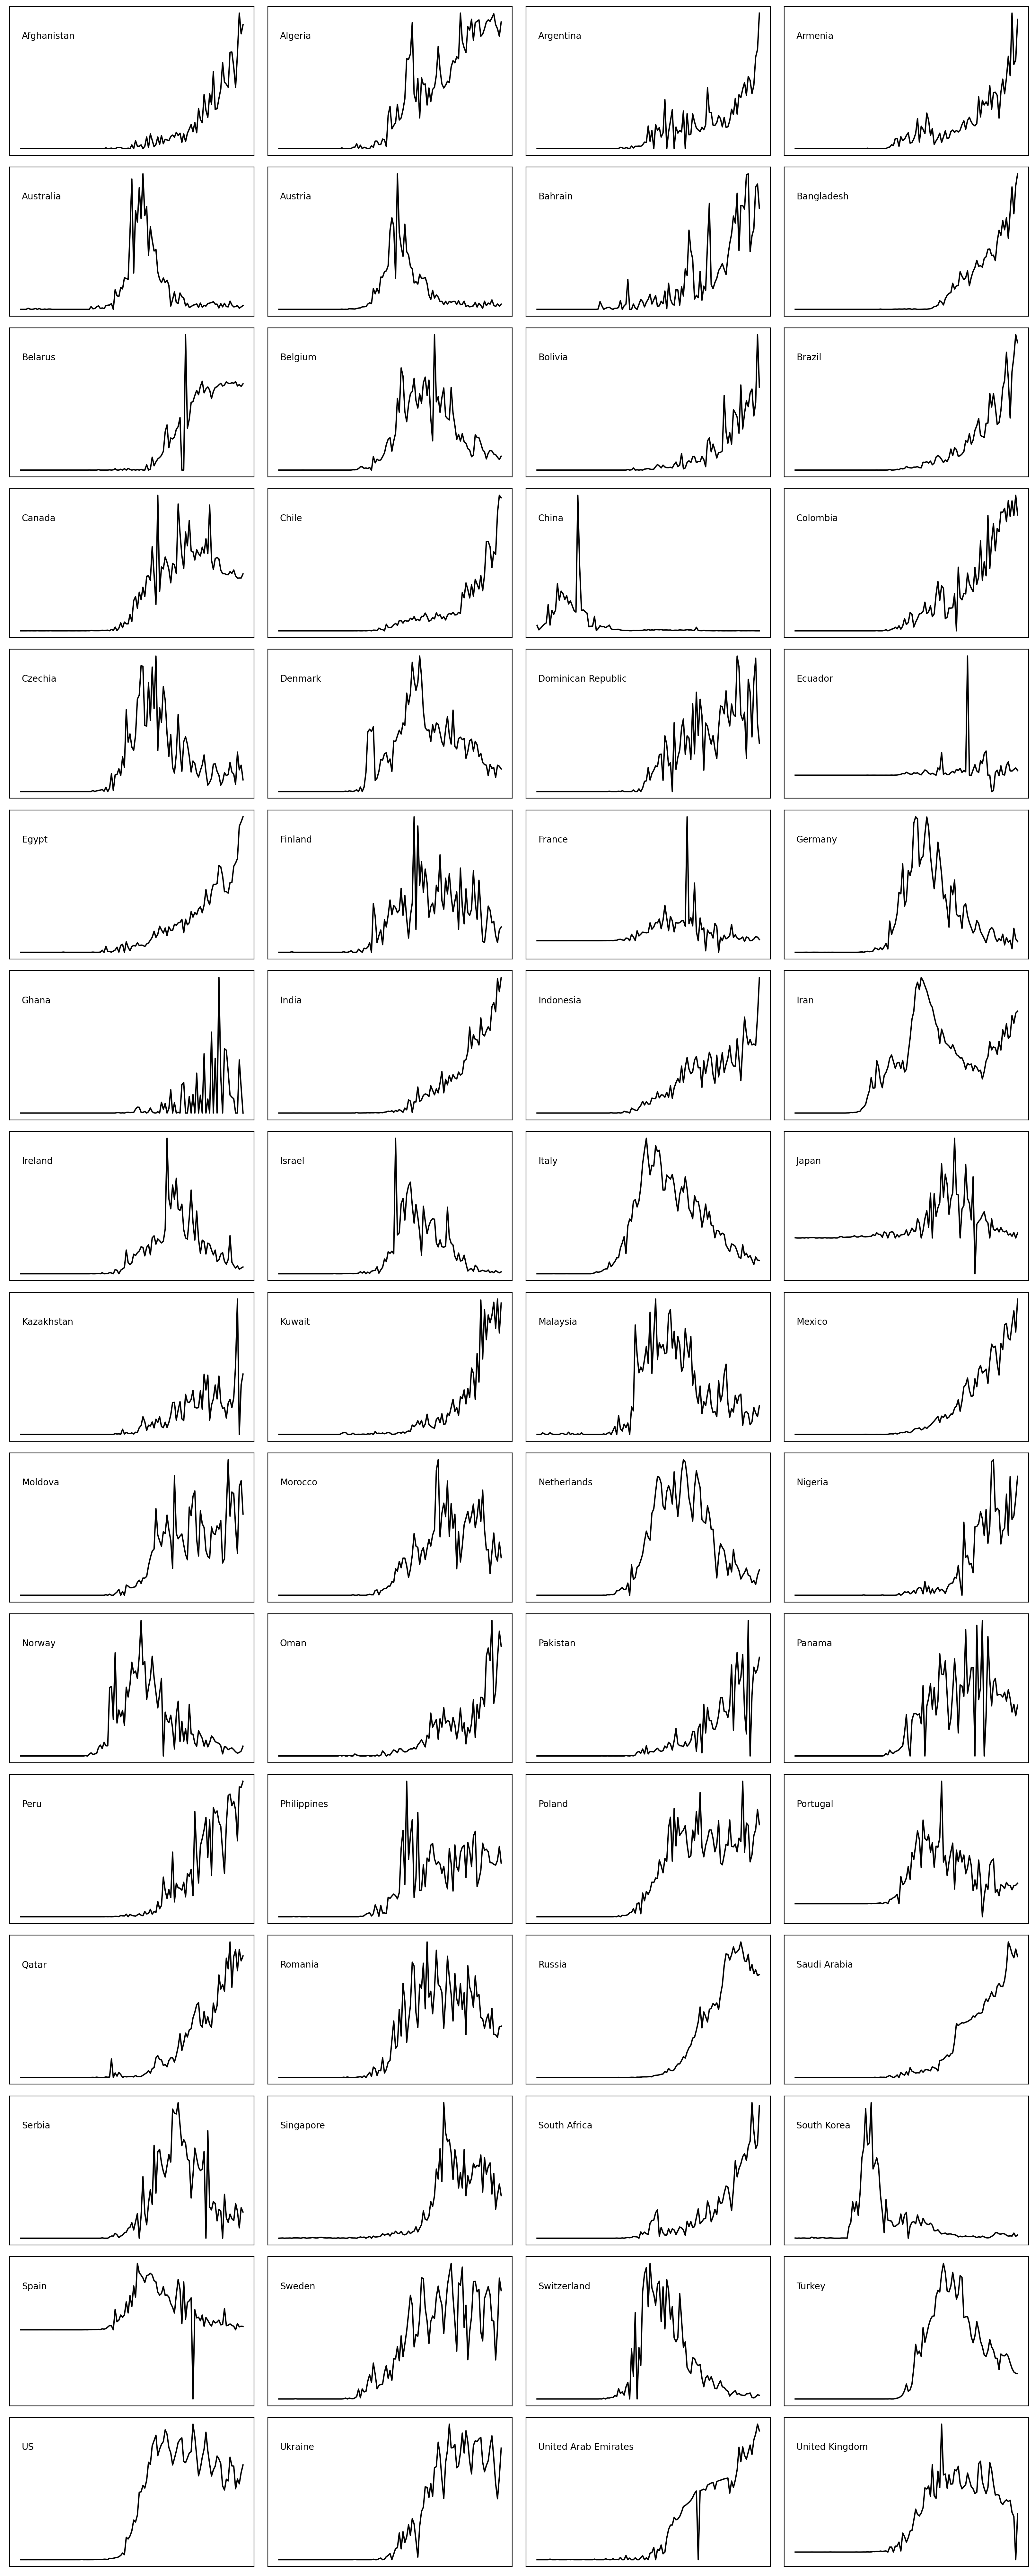

In [97]:
fig = plt.figure(figsize=(16,40), dpi=200, constrained_layout=True)

axs = fig.subplots(nrows=16, ncols=4)

for i in range(len(new_data_thousand_norm.columns)):
    # plot column
    axs.flat[i].plot(new_data_thousand_norm.index, new_data_thousand_norm.iloc[:,i], color='black')
    # remove axis labels
    axs.flat[i].get_xaxis().set_ticks([])
    axs.flat[i].get_yaxis().set_ticks([])
    # write contry notation
    axs.flat[i].annotate(new_data_thousand_norm.iloc[:,i].name, (0.05, 0.8),xycoords='axes fraction', va='center', ha='left')

Use [Scikit-bio](http://scikit-bio.org/) for [DistanceMatrix](http://scikit-bio.org/docs/latest/generated/skbio.stats.distance.html)

The Bray Curtis dissimilarity is used to **quantify the differences in species populations between two different sites.**
It’s used primarily in ecology and biology, and can be calculated with the following formula:

\begin{equation*}
    BC_{ij} = 1 - \frac{2C_{ij}}{S_{i} + S_{j}}
\end{equation*}

In [98]:
def bray_curtis_distance(table, sample1_id, sample2_id):
    '''function to calculate bray-curtis distance'''
    numerator = 0
    denominator = 0
    sample1_counts = table[sample1_id]
    sample2_counts = table[sample2_id]
    for sample1_count, sample2_count in zip(sample1_counts, sample2_counts):
        numerator += abs(sample1_count - sample2_count)
        denominator += sample1_count + sample2_count
    return numerator / denominator

In [99]:
from skbio.stats.distance import DistanceMatrix
from numpy import zeros

def table_to_distances(table, pairwise_distance_fn):
    '''pairwise distance as a table'''
    sample_ids = table.columns
    num_samples = len(sample_ids)
    data = zeros((num_samples, num_samples))
    for i, sample1_id in enumerate(sample_ids):
        for j, sample2_id in enumerate(sample_ids[:i]):
            data[i,j] = data[j,i] = pairwise_distance_fn(table, sample1_id, sample2_id)
    return DistanceMatrix(data, sample_ids)

In [100]:
# Produce a bray-curtis distance matrix
bc_dm = table_to_distances(new_data_thousand_norm, bray_curtis_distance)
print(bc_dm)

64x64 distance matrix
IDs:
'Afghanistan', 'Algeria', 'Argentina', 'Armenia', 'Australia', 'Austria', ...
Data:
[[0.         0.4497469  0.23955941 ... 0.43459714 0.32838223 0.53289654]
 [0.4497469  0.         0.43873501 ... 0.1641536  0.17486936 0.24717885]
 [0.23955941 0.43873501 0.         ... 0.43935057 0.36233748 0.46692753]
 ...
 [0.43459714 0.1641536  0.43935057 ... 0.         0.1654309  0.27563375]
 [0.32838223 0.17486936 0.36233748 ... 0.1654309  0.         0.28419598]
 [0.53289654 0.24717885 0.46692753 ... 0.27563375 0.28419598 0.        ]]


[scikit-learn PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

In [101]:
# Using PCA on distance matrix and keep the first two components
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
projected = pca.fit_transform(bc_dm.data)

In [102]:
# Variance explained by the first two components
print(pca.explained_variance_)

[1.31501431 0.61131101]


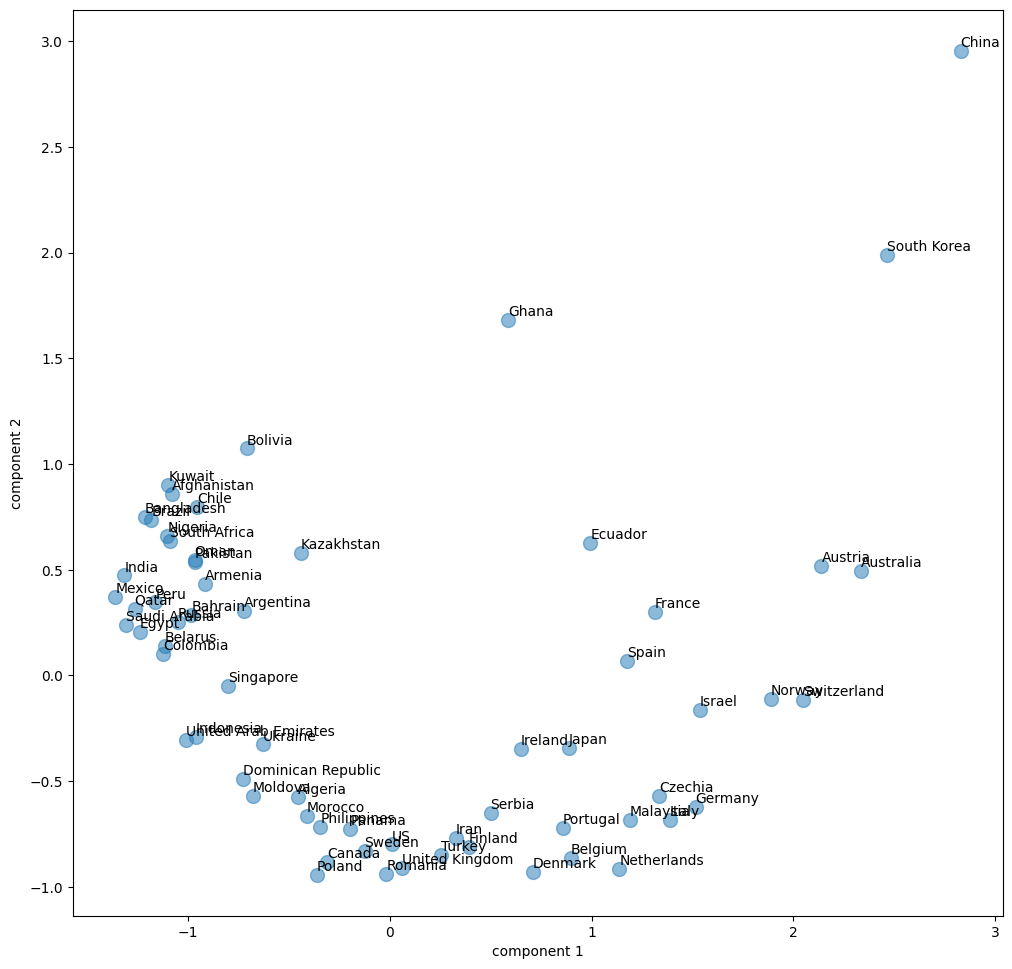

In [103]:
plt.figure(figsize=(12,12), dpi=100)

plt.scatter(projected[:, 0], projected[:, 1], s=100, alpha=0.5)
plt.xlabel('component 1')
plt.ylabel('component 2')

for i, txt in enumerate(bc_dm.ids):
    plt.annotate(txt, (projected[:, 0][i], projected[:, 1][i]+0.02))

In [104]:
# Cluster countries using K-mean
from sklearn.cluster import KMeans

kmeans = KMeans(init='k-means++', n_clusters=5, random_state=0).fit(projected)
kmeans.labels_

array([2, 1, 2, 2, 0, 0, 2, 2, 2, 3, 2, 2, 1, 2, 4, 2, 3, 3, 1, 0, 2, 1,
       0, 3, 0, 2, 2, 1, 3, 0, 3, 3, 2, 2, 3, 2, 1, 1, 3, 2, 0, 2, 2, 1,
       2, 1, 1, 3, 2, 1, 2, 2, 3, 2, 2, 4, 0, 1, 0, 1, 1, 1, 2, 1],
      dtype=int32)

In [105]:
# Assign color to each cluster
color = []
for i in kmeans.labels_:
    if i == 0:
        color.append('#d7191c')
    elif i == 1:
        color.append('#2b83ba')
    elif i == 2:
        color.append('#1a9641')
    elif i == 3:
        color.append('#a6d96a')
    else:
        color.append('#fdae61')

In [106]:
# Create a metadata table
cluster_data = pd.DataFrame({'Cluster':kmeans.labels_,
                            'Country':bc_dm.ids,
                            'Color':color,
                            'Confirmed':[new_data_thousand[i].sum() for i in bc_dm.ids],
                            'PC1':projected[:, 0],
                            'PC2':projected[:, 1],
                           },)
cluster_data

,Cluster,Country,Color,Confirmed,PC1,PC2
0,2,Afghanistan,#1a9641,8676.0,-1.081113,0.859819
1,1,Algeria,#2b83ba,7728.0,-0.457019,-0.577100
2,2,Argentina,#1a9641,9931.0,-0.722590,0.303493
3,2,Armenia,#1a9641,5606.0,-0.917478,0.433692
4,0,Australia,#d7191c,7095.0,2.334243,0.493538
...,...,...,...,...,...,...
59,1,Turkey,#2b83ba,153548.0,0.255439,-0.847594
60,1,US,#2b83ba,1577147.0,0.009176,-0.799355
61,1,Ukraine,#2b83ba,19706.0,-0.631117,-0.326440
62,2,United Arab Emirates,#1a9641,26898.0,-1.012072,-0.303026


In [107]:
# Re-assign cluster id as desired order
cluster_data = cluster_data.replace({'Cluster': {0: 9, 1: 7, 2:5, 3:6, 4:8}})
cluster_data = cluster_data.sort_values(by=['Cluster', 'Cases'], ascending=False)
cluster_data = cluster_data.reset_index(drop=True)
cluster_data

,Cluster,Country,Color,Confirmed,PC1,PC2
0,9,Spain,#d7191c,233037.0,1.177523,0.070109
1,9,France,#d7191c,181951.0,1.311992,0.298615
2,9,Ecuador,#d7191c,35306.0,0.992734,0.627400
3,9,Switzerland,#d7191c,30694.0,2.050318,-0.115923
4,9,Israel,#d7191c,16683.0,1.537335,-0.164390
...,...,...,...,...,...,...
59,5,Kazakhstan,#1a9641,7234.0,-0.440618,0.580255
60,5,Nigeria,#1a9641,7016.0,-1.103124,0.661522
61,5,Oman,#1a9641,6370.0,-0.967577,0.547037
62,5,Armenia,#1a9641,5606.0,-0.917478,0.433692


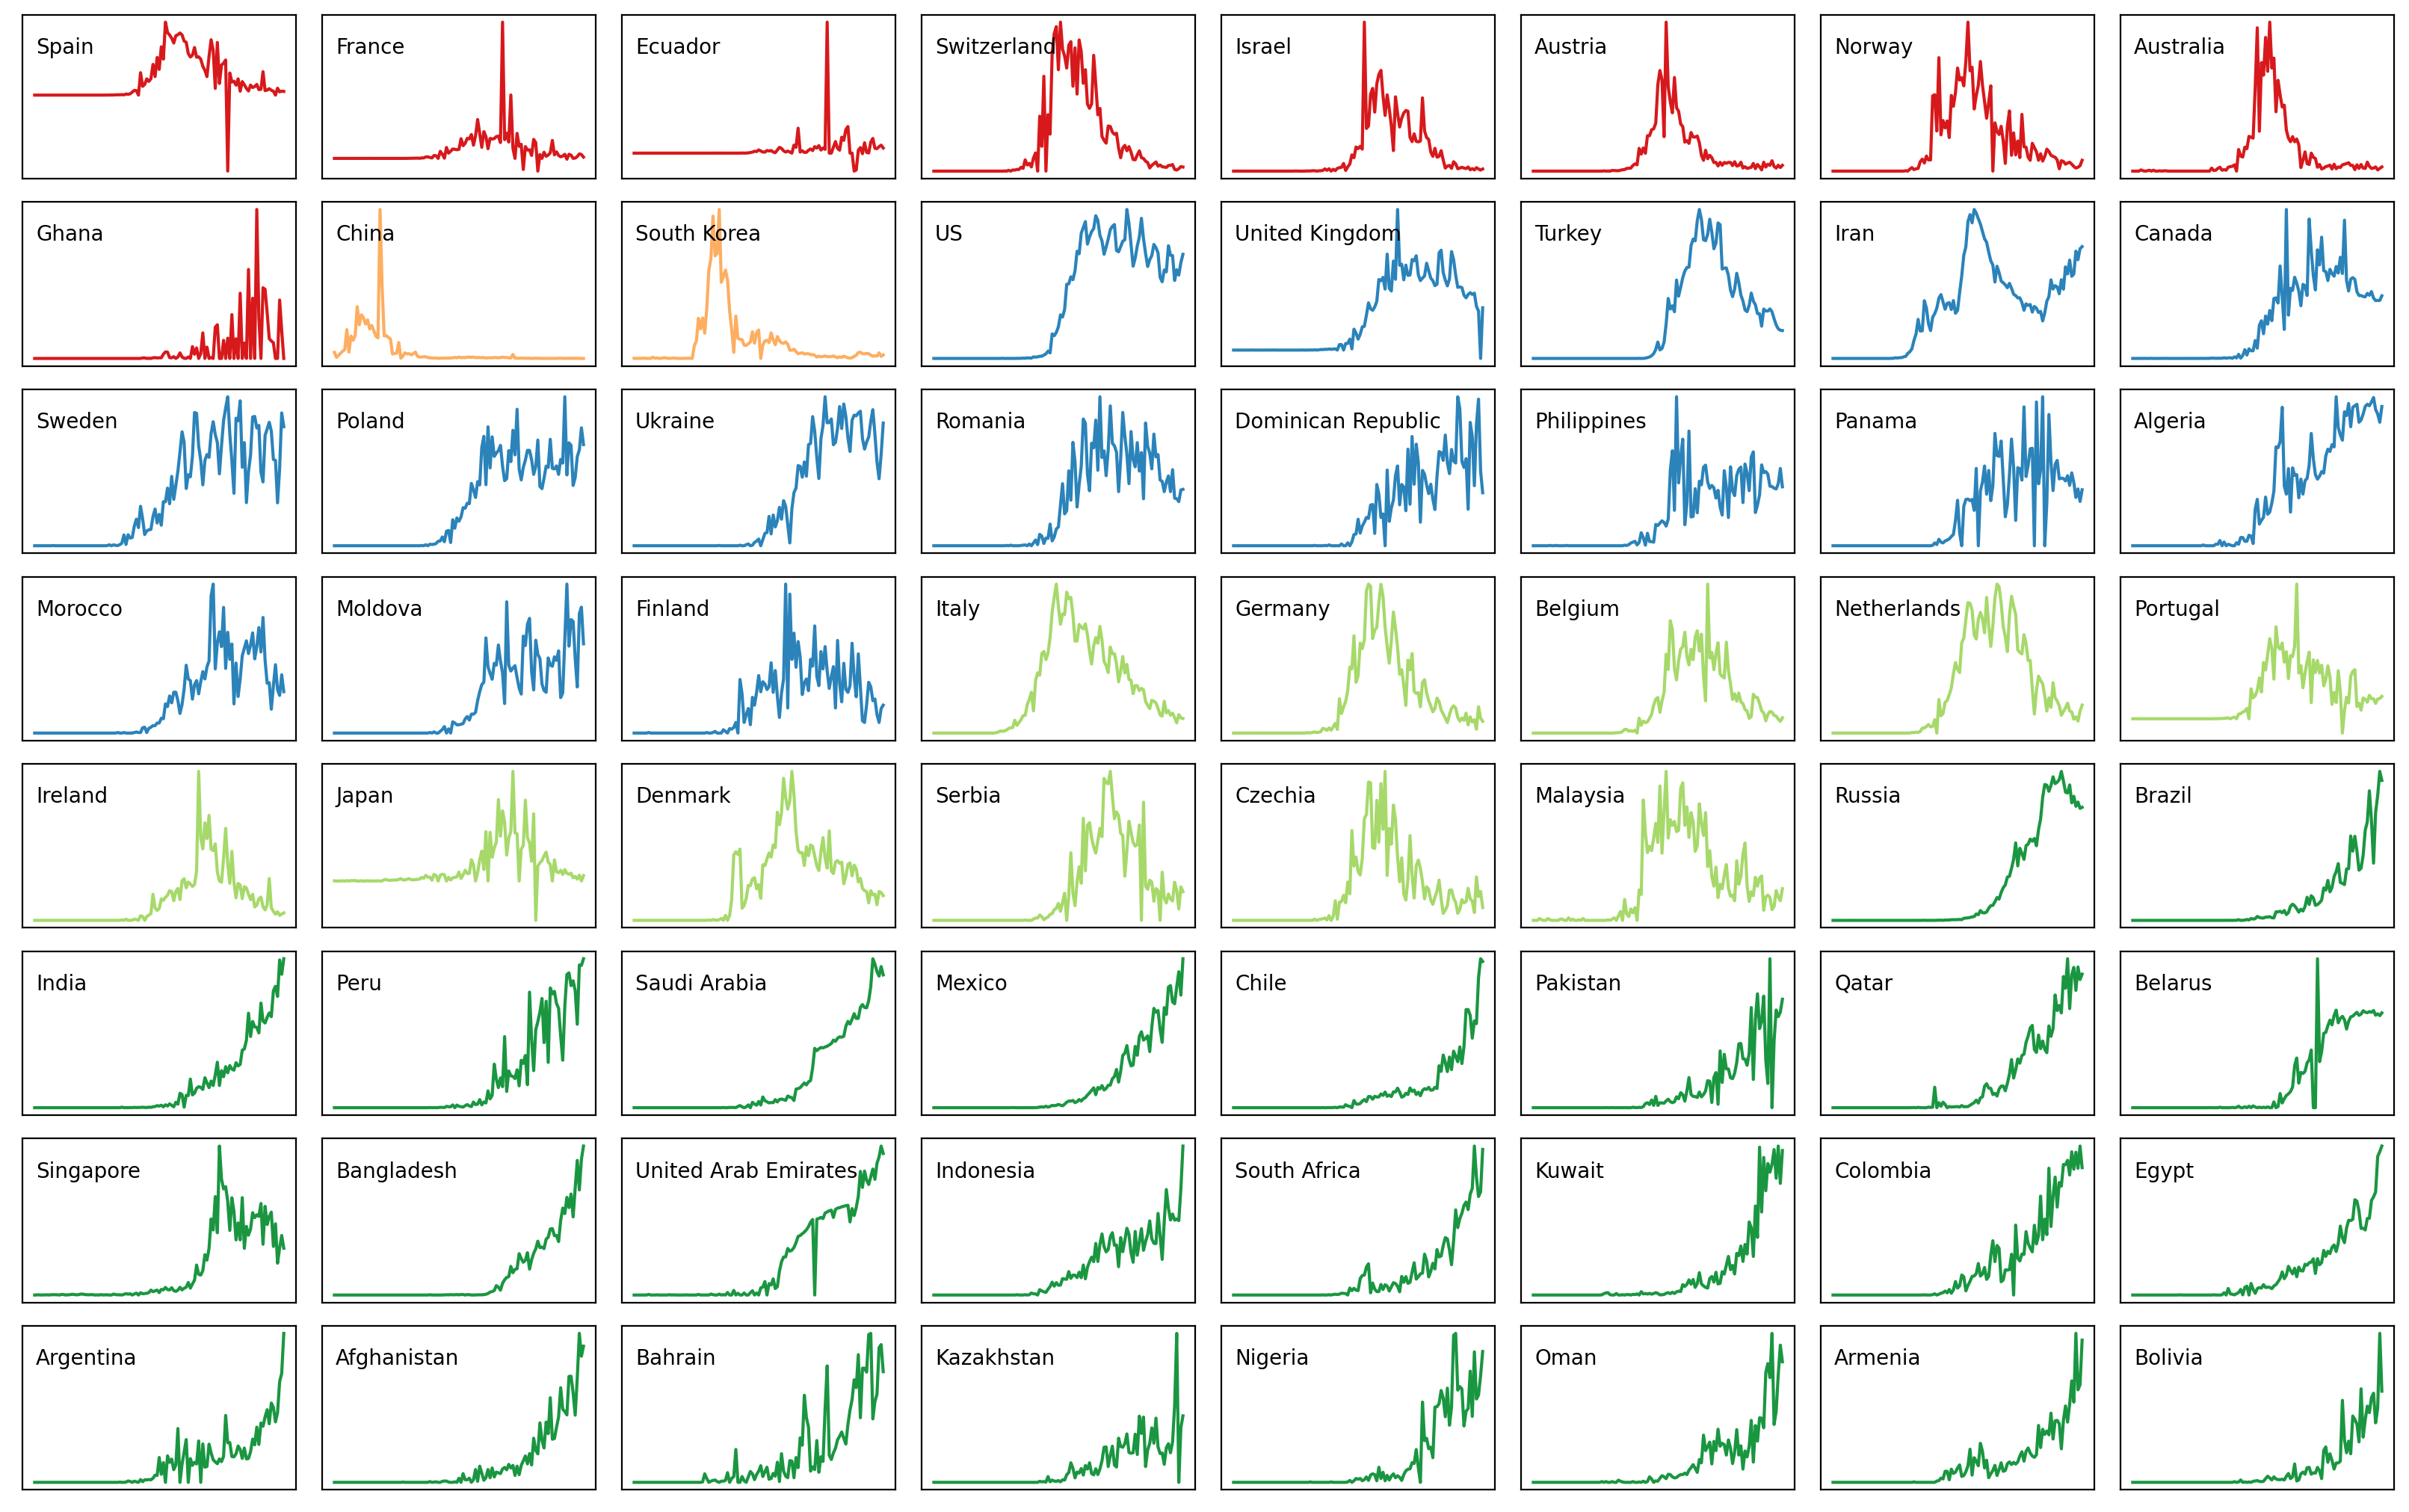

In [122]:
fig1 = plt.figure(figsize=(16,10), dpi=200, constrained_layout=True)

axs1 = fig1.subplots(nrows=8, ncols=8)

for order, i in cluster_data.iterrows():          
        axs1.flat[order].plot(new_data_thousand_norm.index, new_data_thousand_norm[i['Country']], color=i['Color'])
        axs1.flat[order].get_xaxis().set_ticks([])
        axs1.flat[order].get_yaxis().set_ticks([])
        axs1.flat[order].annotate(i['Country'], (0.05, 0.8),xycoords='axes fraction', va='center', ha='left')

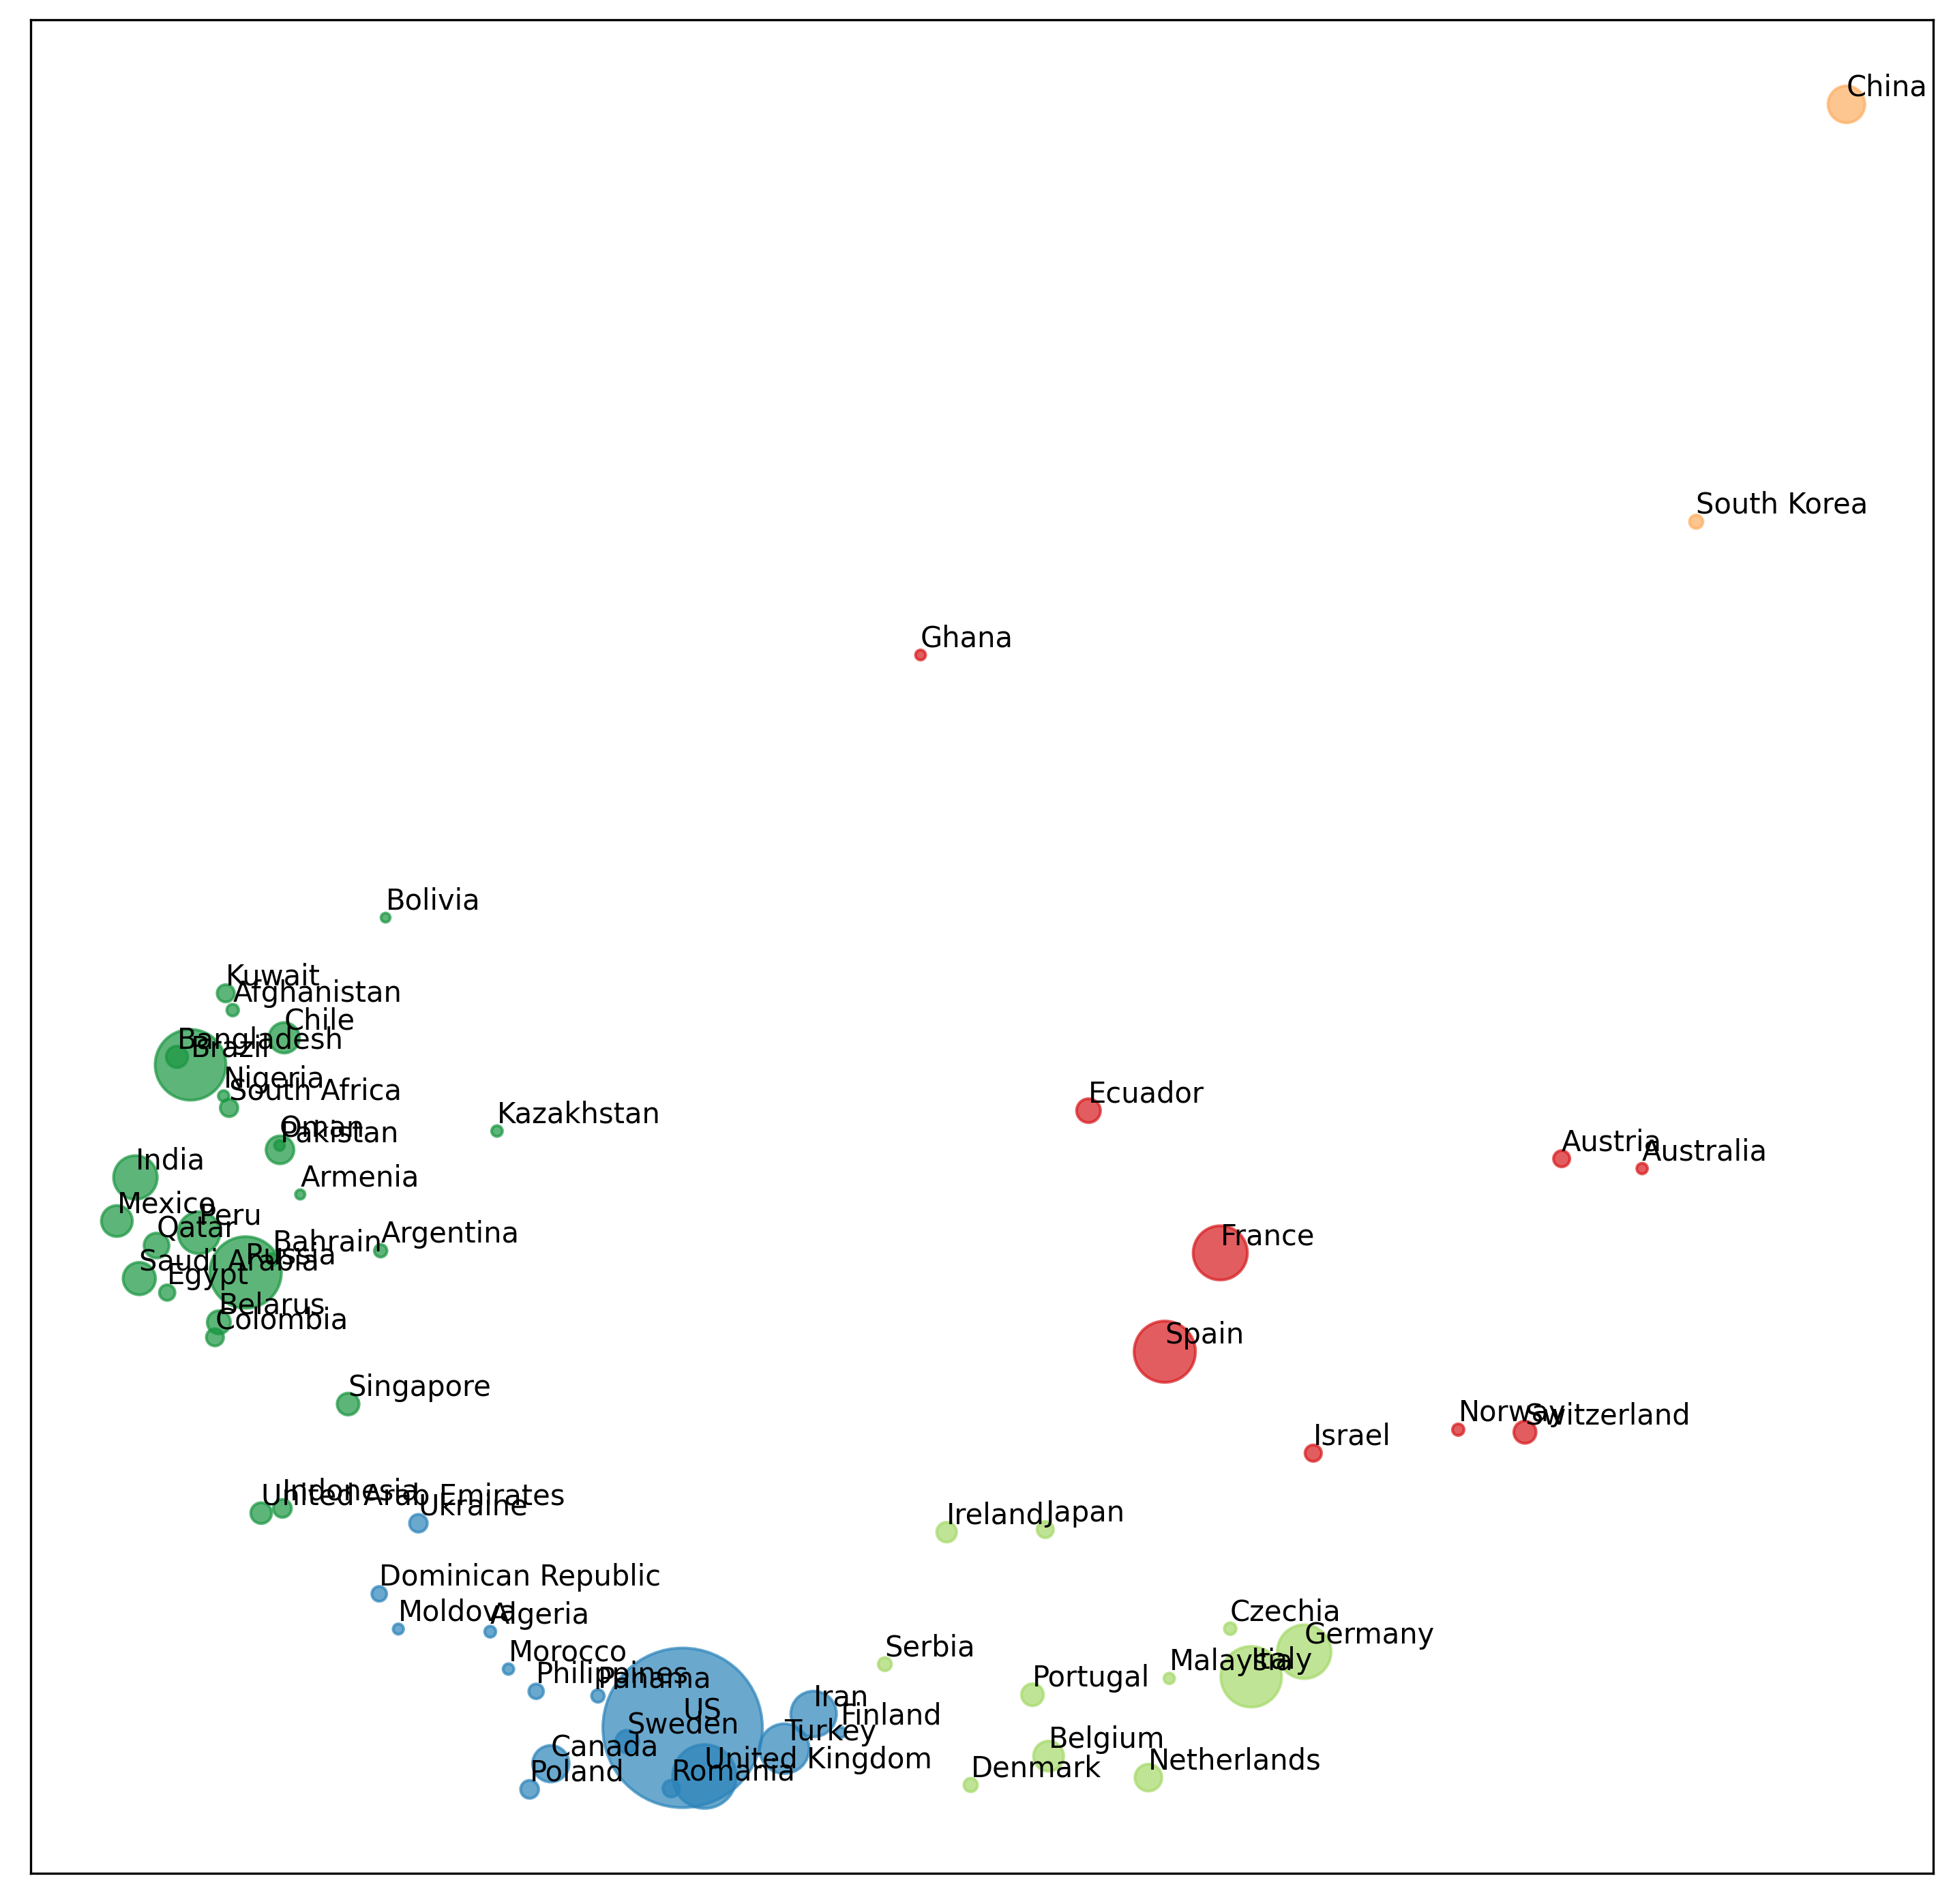

In [128]:
fig3 = plt.figure(figsize=(12,12), dpi=300)
ax1 = fig3.add_subplot()

ax1.scatter(cluster_data['PC1'], cluster_data['PC2'], c=cluster_data['Color'], s=cluster_data['Confirmed']/500, alpha=0.7)
ax1.get_xaxis().set_ticks([])
ax1.get_yaxis().set_ticks([])
#ax1.set_xlabel('PC1({:.2%} variance explaianed)'.format(pca.explained_variance_[0]))
#ax1.set_ylabel('PC2({:.2%} variance explaianed)'.format(pca.explained_variance_[1]))

for i, txt in enumerate(cluster_data['Country']):
    ax1.annotate(txt, (cluster_data['PC1'][i], cluster_data['PC2'][i]+0.02))

In [129]:
cluster_data

,Cluster,Country,Color,Confirmed,PC1,PC2
0,9,Spain,#d7191c,233037.0,1.177523,0.070109
1,9,France,#d7191c,181951.0,1.311992,0.298615
2,9,Ecuador,#d7191c,35306.0,0.992734,0.627400
3,9,Switzerland,#d7191c,30694.0,2.050318,-0.115923
4,9,Israel,#d7191c,16683.0,1.537335,-0.164390
...,...,...,...,...,...,...
59,5,Kazakhstan,#1a9641,7234.0,-0.440618,0.580255
60,5,Nigeria,#1a9641,7016.0,-1.103124,0.661522
61,5,Oman,#1a9641,6370.0,-0.967577,0.547037
62,5,Armenia,#1a9641,5606.0,-0.917478,0.433692


In [132]:
new_data_thousand_norm

Country/Region,Afghanistan,Algeria,Argentina,Armenia,Australia,Austria,Bahrain,Bangladesh,Belarus,Belgium,...,South Africa,South Korea,Spain,Sweden,Switzerland,Turkey,US,Ukraine,United Arab Emirates,United Kingdom
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.001175,0.510273,0.000000,0.000000,0.000000,0.000028,0.000000,0.000000,0.056096
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.510273,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.056096
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.001175,0.510273,0.000000,0.000000,0.000000,0.000028,0.000000,0.000000,0.056096
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.510273,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.056096
4,0.000000,0.000000,0.000000,0.000000,0.008048,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.001175,0.510273,0.000000,0.000000,0.000000,0.000083,0.000000,0.000000,0.056096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,0.450947,0.994975,0.405864,0.538462,0.020121,0.031037,0.542857,0.717992,0.652525,0.118582,...,1.000000,0.017626,0.510273,0.573892,0.011355,0.266251,0.523295,0.749135,0.776833,0.438067
117,0.702238,0.914573,0.467593,1.000000,0.028169,0.020439,0.592208,0.903553,0.620875,0.113692,...,0.791379,0.015276,0.556448,0.288177,0.007570,0.225380,0.595529,0.562284,0.884166,0.349438
118,1.000000,0.884422,0.675926,0.621083,0.008048,0.039364,0.903896,0.705584,0.630303,0.094540,...,0.661207,0.037603,0.532191,0.519704,0.015897,0.198910,0.559854,0.449827,0.927736,0.318634
119,0.846816,0.829146,0.731481,0.655271,0.018109,0.024224,0.924675,0.912014,0.618182,0.078240,...,0.692241,0.014101,0.536615,0.891626,0.030280,0.189179,0.643445,0.612457,1.000000,0.000000


In [133]:
new_data_thousand

Country/Region,Afghanistan,Algeria,Argentina,Armenia,Australia,Austria,Bahrain,Bangladesh,Belarus,Belgium,...,South Africa,South Korea,Spain,Sweden,Switzerland,Turkey,US,Ukraine,United Arab Emirates,United Kingdom
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2020-01-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2020-01-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-26,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-17,262.0,198.0,263.0,189.0,10.0,41.0,209.0,1273.0,969.0,291.0,...,1160.0,15.0,0.0,466.0,15.0,1368.0,18937.0,433.0,731.0,3534.0
2020-05-18,408.0,182.0,303.0,351.0,14.0,27.0,228.0,1602.0,922.0,279.0,...,918.0,13.0,908.0,234.0,10.0,1158.0,21551.0,325.0,832.0,2714.0
2020-05-19,581.0,176.0,438.0,218.0,4.0,52.0,348.0,1251.0,936.0,232.0,...,767.0,32.0,431.0,422.0,21.0,1022.0,20260.0,260.0,873.0,2429.0


In [162]:
classified_dataframe = new_data_thousand.transpose()
classified_dataframe

Date,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2020-05-12,2020-05-13,2020-05-14,2020-05-15,2020-05-16,2020-05-17,2020-05-18,2020-05-19,2020-05-20,2020-05-21
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,276.0,263.0,413.0,414.0,349.0,262.0,408.0,581.0,492.0,531.0
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,176.0,186.0,189.0,187.0,192.0,198.0,182.0,176.0,165.0,186.0
Argentina,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,285.0,316.0,255.0,345.0,326.0,263.0,303.0,438.0,474.0,648.0
Armenia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,146.0,180.0,142.0,184.0,239.0,189.0,351.0,218.0,230.0,335.0
Australia,0.0,0.0,0.0,0.0,4.0,1.0,0.0,1.0,3.0,0.0,...,10.0,9.0,30.0,16.0,9.0,10.0,14.0,4.0,9.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Turkey,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1704.0,1639.0,1635.0,1708.0,1610.0,1368.0,1158.0,1022.0,972.0,961.0
US,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,2.0,...,21495.0,21030.0,27368.0,25050.0,24996.0,18937.0,21551.0,20260.0,23285.0,25294.0
Ukraine,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,375.0,402.0,422.0,483.0,528.0,433.0,325.0,260.0,354.0,476.0


In [163]:
# create cluster column
output_cluster_data = cluster_data.sort_values(by=['Country'])
output_cluster_data = output_cluster_data.reset_index(drop=True)
# insert new column in
classified_dataframe.insert(0, "Cluster", output_cluster_data['Cluster'].to_list(), allow_duplicates=True)
classified_dataframe

Date,Cluster,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,...,2020-05-12 00:00:00,2020-05-13 00:00:00,2020-05-14 00:00:00,2020-05-15 00:00:00,2020-05-16 00:00:00,2020-05-17 00:00:00,2020-05-18 00:00:00,2020-05-19 00:00:00,2020-05-20 00:00:00,2020-05-21 00:00:00
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,276.0,263.0,413.0,414.0,349.0,262.0,408.0,581.0,492.0,531.0
Algeria,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,176.0,186.0,189.0,187.0,192.0,198.0,182.0,176.0,165.0,186.0
Argentina,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,285.0,316.0,255.0,345.0,326.0,263.0,303.0,438.0,474.0,648.0
Armenia,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,146.0,180.0,142.0,184.0,239.0,189.0,351.0,218.0,230.0,335.0
Australia,9,0.0,0.0,0.0,0.0,4.0,1.0,0.0,1.0,3.0,...,10.0,9.0,30.0,16.0,9.0,10.0,14.0,4.0,9.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Turkey,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1704.0,1639.0,1635.0,1708.0,1610.0,1368.0,1158.0,1022.0,972.0,961.0
US,7,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,...,21495.0,21030.0,27368.0,25050.0,24996.0,18937.0,21551.0,20260.0,23285.0,25294.0
Ukraine,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,375.0,402.0,422.0,483.0,528.0,433.0,325.0,260.0,354.0,476.0
